# HIPÓTSIS 2
La mayoría de los ataques de tiburones han sido reportados a varones que estaban haciendo surf.

## Limpieza

In [1]:
import pandas as pd
import src.limpieza_texto as lt

pd.options.mode.chained_assignment = None  # default='warn

Utilizamos las librerías pandas y "limpieza de texto", una libreria propia para agrupar todas las funciones principales. Un listado de sus cabeceras.

def year_cleaner(srk,column_years)

def trunca_comas(data,col):

def similar(a,b): 

def dime_continente(p,dicc):       

def busca_contienente(data,col,col_n,dicc):

def esta_en_dicc(e,dic):

def pise_usuario(dicc,p):

def pide_continente(data,dicc,p,c):
       

 

Nuestro código principal lo dividimos en la parte de limpieza en un archivo .py que lee el CSV de los attaques y devuelve el proceso en otro CSV para poseriormente verlovisualizarlo.

Leemos y comenzamos a trabajar sobre la columna Years.

De etre todos los pises nos quedamos solo con Australia.

Leemos el csv histórico de la temperatura en el país.

Con la funciión histograma nos quedamos sólo con la información del número de ataques por año.

Recortamos ambos drames sólo con los años que nos interesan.

Unimos ambas tablas en un único data frame

In [4]:
srk = pd.read_csv("./data/attacks.csv",encoding = "ISO-8859-1")
column_years='Years'
srk = lt.year_cleaner(srk,column_years)
pais = 'AUSTRALIA'
srk_country = lt.clean_one_country(srk, pais)
temp = lt.read_temp("./data/temp.csv", column_years)
magnitud='Attacks'
srk_hist = lt.histograma(srk_country,column_years,magnitud)

primero = 1950
ultimo = 2017
temp = lt.filter_years(temp, primero, ultimo)
srk_hist  = lt.filter_years(srk_hist, primero, ultimo)

df=lt.unir(temp,srk_hist)
df.to_csv(path_or_buf='./outputs/anyos_out.csv',index=True)
df

,Tanomaly,10yav,Termal Variation,10yvariation,Attacks
Years,,,,,
1950,-0.17,-0.135,0.17,0.135,13
1951,-0.33,-0.133,0.33,0.133,9
1952,-0.20,-0.148,0.20,0.148,5
1953,-0.27,-0.205,0.27,0.205,12
1954,-0.32,-0.254,0.32,0.254,6
...,...,...,...,...,...
2013,0.44,0.422,0.44,0.422,20
2014,0.40,0.425,0.40,0.425,29
2015,0.26,0.402,0.26,0.402,31


A continuación leemos los datos de los paises por continentes en un csv.

In [ ]:
csv='./data/continent.csv'
dicc=lt.continentes(csv)

In [ ]:
df['Country'].fillna('', inplace=True)
df=lt.trunca_comas(df,'Country')
df=lt.busca_contienente(df,'Country','Continent',dicc)
df=lt.pide_continente(df,dicc,'Country','Continent')

In [ ]:
Limpiamos de nan y quitarmos comas de la columna de paises.
A partir del listado de continentes nos construimos un diccionario de tipo:

NOTA:
    {CONT1:{ PAISES...PAISES}, CONT2:{ PAISES...PAISES}...}
    
Donde la clave son los 5 contienen tes en mayúsculas y los valores el conjunto de paises que lo forman.
Poseriormente la última función es capaz de desde la columna COuntry encontrar a qué continente pertenece. 

Los que están en la lista los encuentra sin problema y los que no hace una aproximación por cadena.

In [ ]:
df.rename(columns = {'Sex ':'Gender'}, inplace=True)
df=lt.clean_gender(df,'Gender')
df.to_csv(path_or_buf='./outputs/cont_out.csv',index=True)

Renombramos con más estilo la columna de género y guardamps la nueva BD

## Visualización

Partimos del CSV entregado por el proceso de limpieza

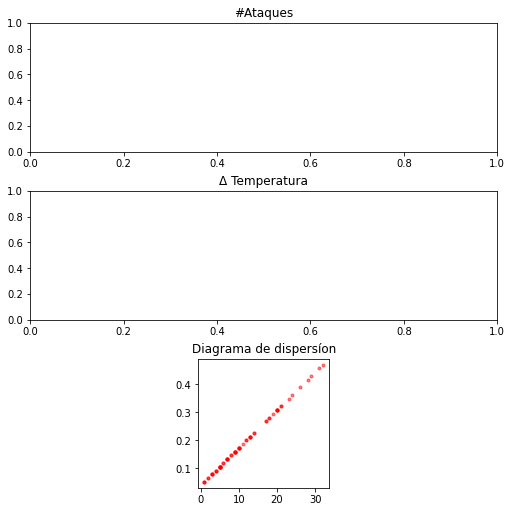

NameError: name 'corr' is not defined

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np

df = pd.read_csv("./outputs/anyos_out.csv",encoding = "ISO-8859-1")


fig3 = plt.figure(constrained_layout=True)
fig3.set_size_inches(7, 7)

gs = fig3.add_gridspec(3,3)

f3_ax1 = fig3.add_subplot(gs[0,:])
f3_ax1.set_title('#Ataques')

f3_ax2 = fig3.add_subplot(gs[1,:])
f3_ax2.set_title('Δ Temperatura')

f3_ax3 = fig3.add_subplot(gs[-2:-1])
f3_ax3.set_title('Diagrama de dispersíon')

correlacion=df[['10yvariation','Attacks']].corr()
corre=correlacion.Attacks['10yvariation']

f3_ax3.annotate(f"Correlación = {corre}", xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

z = np.polyfit(df.Attacks, df['10yvariation'], 1)
p = np.poly1d(z)
plt.plot(df.Attacks,p(df.Attacks),"r. ", alpha=0.5)

plt.show()

fig3.savefig('./fig/attacks-temp.png')

Con el df obtenido podemos observar la evolución de ambas variables y su diagrama de dispersión:

<img src="https://github.com/emiliocarrascomoreno/sharkstattack/blob/master/fig/attacks-temp.png?raw=true">

Podemos Observar la similitud de la curva entre 1950 y 2017, además de el diagrama de dispersión y su recta de aproximación.

Además la correlación que obtenemos es bastante alta: 0,78

## Conclusiones

Nuestra hipótesis no queda descartada y puede que sea correcta
